In [1]:
import os
import logging
from transformers import logging as transformers_logging
import tensorflow as tf
from mongo_db_client import MongoDbClient
from embedding_dataset import EmbeddingDataset
import numpy as np
from embedding_generator import EmbeddingGenerator

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.get_logger().setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
transformers_logging.set_verbosity_error()

/Users/beto/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
with EmbeddingDataset(dataset_name='embeddings', dataset_dir='../datasets/embeddings/') as embedding_dataset:
  embedding = next(embedding_dataset.list())

In [5]:
embedding['code_embedding'].min(), embedding['code_embedding'].max()

(-0.14047429, 0.11361516)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_embeddings(code_embedding, comment_embedding):
  fig, axes = plt.subplots(1, 2)

  code_graph, comment_graph = axes[0], axes[1]

  code_graph.plot(code_embedding, color='red')
  code_graph.set_title('Code')

  comment_graph.plot(comment_embedding)
  comment_graph.set_title('Comment')

  fig.tight_layout()
  fig.show()

/var/folders/ym/hn614bsx1nzg_btp2v5m6syh0000gp/T/ipykernel_32549/1009671727.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


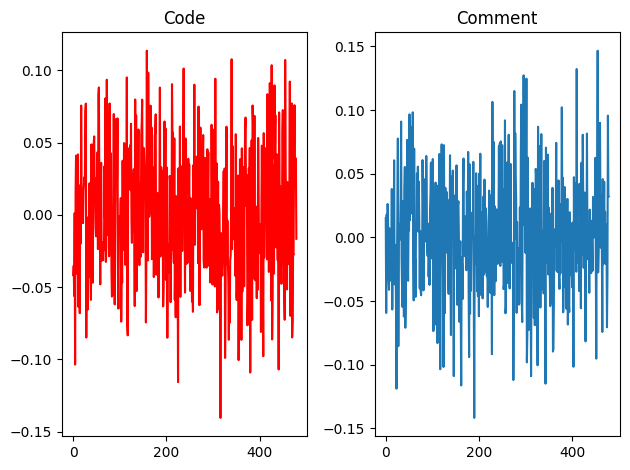

In [12]:
plot_embeddings(embedding['code_embedding'], embedding['comment_embedding'])